In [118]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from yellowbrick.regressor import PredictionError
import pickle as pk
from IPython.display import FileLink

In [119]:
#read csv file
df = pd.read_csv("FDM1.csv")

In [120]:
# Checking the first few rows of the DataFrame
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,15.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
2,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
3,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0


<Figure size 200x100 with 0 Axes>

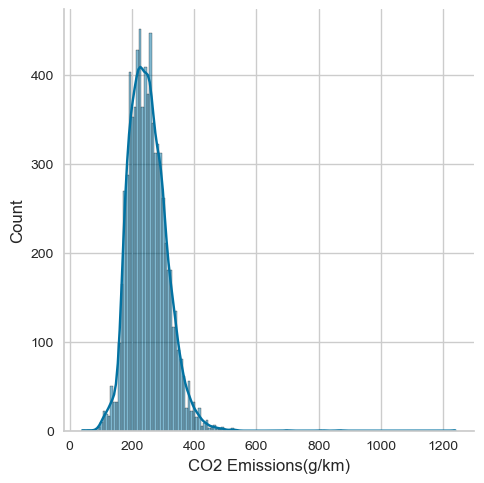

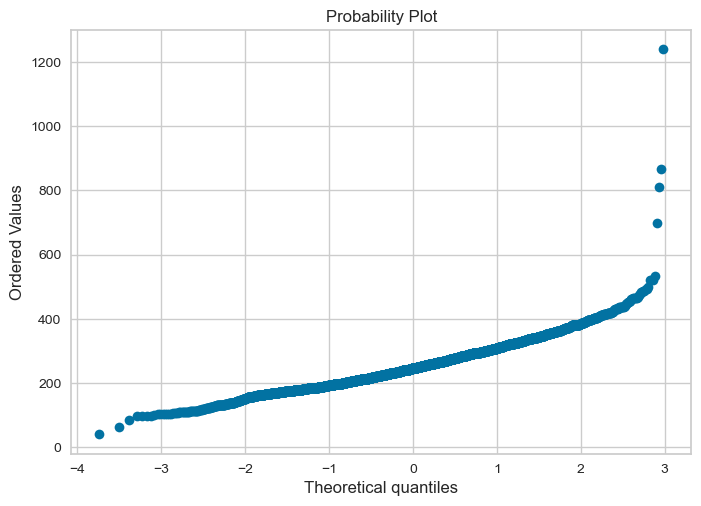

In [121]:
#histogram and normal probability plot
from scipy.stats import norm
plt.figure(figsize=(2, 1))
sns.displot(df['CO2 Emissions(g/km)'], kde=True)
fig = plt.figure()
res = stats.probplot(df['CO2 Emissions(g/km)'], plot=plt)

In [122]:
#checking wheater there is null value
df.isna().sum()

Make                                 0
Model                                1
Vehicle Class                        3
Engine Size(L)                       3
Cylinders                            2
Transmission                         8
Fuel Type                            4
Fuel Consumption City (L/100 km)    10
Fuel Consumption Hwy (L/100 km)      9
Fuel Consumption Comb (L/100 km)     9
Fuel Consumption Comb (mpg)          5
CO2 Emissions(g/km)                 10
dtype: int64

In [123]:
# Checking specific rows where the "Model" column is null
df[df[["Model"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
9,ACURA,NaN,MID-SIZE,3.5,6.0,AS7,Z,12.6,9.2,10.1,25.0,259.0


In [124]:
# Filtering rows based on specific conditions (ACURA and Cylinders)
df[(df["Make"] == "ACURA") & (df["Cylinders"] == 6.0) ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.10,25.0,255.0
5,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.60,27.0,244.0
6,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.00,28.0,230.0
7,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.10,28.0,232.0
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.10,25.0,255.0
9,ACURA,NaN,MID-SIZE,3.5,6.0,AS7,Z,12.6,9.2,10.10,25.0,259.0
10,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.60,24.0,267.0
11,ACURA,TL AWD,MID-SIZE,3.5,6.0,AS6,Z,11.9,8.0,9.95,-25.0,NaN
14,ACURA,TSX,COMPACT,3.5,6.0,AS5,Z,12.1,8.3,10.40,27.0,239.0
19,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.10,25.0,255.0


In [125]:
#drop model null value
df = df.dropna(subset=["Model"])

In [126]:
#Rechecking wheater there is null value
df.isna().sum()

Make                                 0
Model                                0
Vehicle Class                        3
Engine Size(L)                       3
Cylinders                            2
Transmission                         8
Fuel Type                            4
Fuel Consumption City (L/100 km)    10
Fuel Consumption Hwy (L/100 km)      9
Fuel Consumption Comb (L/100 km)     9
Fuel Consumption Comb (mpg)          5
CO2 Emissions(g/km)                 10
dtype: int64

In [127]:
# Checking specific rows where the "CO2 Emissions(g/km)" column is null
df[df[["CO2 Emissions(g/km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
11,ACURA,TL AWD,MID-SIZE,3.5,6.0,AS6,Z,11.9,8.0,9.95,-25.0,NaN
15,ACURA,Tsx,COMPACT,2.7,4.0,NaN,Z,15.5,NaN,NaN,25.0,NaN
22,ACURA,RDX AWD,NaN,NaN,8.0,NaN,Z,NaN,NaN,6.70,NaN,NaN
148,AstON MARTIN,RAPIDE S,SUBCOMPACT,5.0,11.0,A8,Z,15.2,NaN,NaN,15.0,NaN
149,AstON MARTIN,RAPIDE S,SUBCOMPACT,4.0,8.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN
150,AstON MARTIN,RAPIDE S,SUBCOMPACT,6.0,12.0,NaN,Z,NaN,NaN,12.20,NaN,NaN
212,AUDI,A6 QUATTRO,SUBCOMPACT,4.2,4.0,AS8,Z,NaN,9.5,NaN,11.0,NaN
213,AUDI,A6 QUATTRO,MID-SIZE,2.0,6.0,A7,Z,NaN,8.1,NaN,15.0,NaN
215,AUDI,s7,MID-SIZE,3.0,8.0,A7,Z,NaN,NaN,12.00,23.0,NaN
216,AUDI,s7,SUBCOMPACT,3.0,4.0,AS8,Z,14.2,NaN,NaN,21.0,NaN


In [128]:
#drop model null value
df = df.dropna(subset=["CO2 Emissions(g/km)"])

In [129]:
# Checking specific rows where the "Fuel Consumption Comb (L/100 km)" column is null
df[df[["Fuel Consumption Comb (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
21,ACURA,ILX,COMPACT,NaN,NaN,NaN,NaN,NaN,5.8,NaN,28.0,140.0
214,AUDI,s7,SUBCOMPACT,2.0,10.0,AS8,Z,NaN,8.8,NaN,NaN,235.0
590,BMW,335i SEDAN,COMPACT,10.0,2.0,NaN,Z,11.5,8.0,NaN,72.0,85.0


In [130]:
#Rechecking wheater there is null value
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       2
Engine Size(L)                      2
Cylinders                           2
Transmission                        4
Fuel Type                           3
Fuel Consumption City (L/100 km)    4
Fuel Consumption Hwy (L/100 km)     2
Fuel Consumption Comb (L/100 km)    3
Fuel Consumption Comb (mpg)         3
CO2 Emissions(g/km)                 0
dtype: int64

In [131]:
# Finding rows with more than 4 missing values and storing their indices
result_df =df[ df.isnull().sum(axis=1) > 4].index
result_df

Int64Index([21, 23], dtype='int64')

In [132]:
# Dropping rows with more than 4 missing values
df.drop(result_df,inplace=True)

In [133]:
result_df

Int64Index([21, 23], dtype='int64')

In [134]:
#Rechecking wheater there is null value
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       1
Engine Size(L)                      0
Cylinders                           0
Transmission                        2
Fuel Type                           1
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    2
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [135]:
# Checking for missing values in the "Fuel Type" column
df[df[["Fuel Type"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
147,AstON MARTIN,DB11 V12,MINICOMPACT4,4.0,14.0,NaN,NaN,NaN,14.4,12.1,18.0,363.0


In [136]:
# Filtering the DataFrame to select rows where the "Make" is "ASTON MARTIN" and the "Model" is "DB11 V12"
df[(df["Make"] == "ASTON MARTIN") & (df["Model"] == "DB11 V12") ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
138,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0
144,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0


In [137]:
# Cleaning and standardizing values in the "Make" column
df["Make"].value_counts()

FORD                                              631
CHEVROLET                                         594
BMW                                               529
MERCEDES-BENZ                                     423
PORSCHE                                           377
TOYOTA                                            336
GMC                                               331
AUDI                                              295
NISSAN                                            259
JEEP                                              253
DODGE                                             249
KIA                                               231
HONDA                                             214
HYUNDAI                                           210
MINI                                              205
VOLKSWAGEN                                        197
MAZDA                                             181
LEXUS                                             178
JAGUAR                      

In [138]:
# Replacing inconsistent values in the "Make" column
df["Make"].replace("AstON MARTIN", "ASTON MARTIN", inplace=True)
df["Make"].replace("LEXUS UX 250h AWD", "LEXUS", inplace=True)
df["Make"].replace("LAND ROVER Range Rover SVAutobiography Dynamic", "LAND ROVER", inplace=True)
df["Make"].replace("LAMBORGHINI Aventador Coupe", "LAMBORGHINI", inplace=True)

In [139]:
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUGATTI', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
       'FIAT', 'FORD', 'GENESIS', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI',
       'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MINI',
       'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION',
       'SMART', 'SRT', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype=object)

In [140]:
# Cleaning and standardizing values in the "Vehicle Class" column
df["Vehicle Class"].value_counts()

SUV - SMALL                  1220
MID-SIZE                     1136
COMPACT                      1026
SUV - STANDARD                741
FULL-SIZE                     642
SUBCOMPACT                    610
PICKUP TRUCK - STANDARD       539
TWO-SEATER                    460
MINICOMPACT                   326
STATION WAGON - SMALL         252
PICKUP TRUCK - SMALL          160
MINIVAN                        81
SPECIAL PURPOSE VEHICLE        77
VAN - PASSENGER                66
STATION WAGON - MID-SIZE       53
VAN - CARGO                    22
 COMPACT                        5
 MID-SIZE                       4
 TWO-SEATER                     3
 SUBCOMPACT                     2
 PICKUP TRUCK - STANDARD        2
 MINICOMPACT                    2
 SUV - SMALL                    2
 SUV - STANDARD                 1
PICKUP TRUCK - SMA              1
 FULL-SIZE                      1
MINICOMPACT4                    1
 STATION WAGON - MID-SIZE       1
Aventador Coupe                 1
 SPECIAL PURPO

In [141]:
# Replacing variations in the "Vehicle Class" column for consistency
df["Vehicle Class"].replace(" COMPACT", "COMPACT", inplace=True)
df["Vehicle Class"].replace(" MID-SIZE", "MID-SIZE", inplace=True)
df["Vehicle Class"].replace(" TWO-SEATER", "TWO-SEATER", inplace=True)
df["Vehicle Class"].replace(" MINICOMPACT", "MINICOMPACT", inplace=True)
df["Vehicle Class"].replace(" PICKUP TRUCK - STANDARD", "PICKUP TRUCK - STANDARD", inplace=True)
df["Vehicle Class"].replace(" SUBCOMPACT", "SUBCOMPACT", inplace=True)
df["Vehicle Class"].replace(" SUV - SMALL", "SUV - SMALL", inplace=True)
df["Vehicle Class"].replace(" MINICOMPACT4", "MINICOMPACT", inplace=True)
df["Vehicle Class"].replace(" SPECIAL PURPOSE VEHICLE", "SPECIAL PURPOSE VEHICLE", inplace=True)
df["Vehicle Class"].replace(" FULL-SIZE", "FULL-SIZE", inplace=True)
df["Vehicle Class"].replace(" SUV - STANDARD", "SUV - STANDARD", inplace=True)
df["Vehicle Class"].replace("PICKUP TRUCK - SMA", "PICKUP TRUCK - SMALL", inplace=True)
df["Vehicle Class"].replace("MINICOMPACT4", "MINICOMPACT", inplace=True)
df["Vehicle Class"].replace(" MINIVAN", "MINIVAN", inplace=True)
df["Vehicle Class"].replace(" STATION WAGON - MID-SIZE", "STATION WAGON - MID-SIZE", inplace=True)
df["Vehicle Class"].replace("Aventador Coupe", "TWO-SEATER", inplace=True)

In [142]:
df["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', nan,
       'MINICOMPACT', 'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'STATION WAGON - MID-SIZE'],
      dtype=object)

In [143]:
# Cleaning and standardizing values in the "Model" column
df["Model"].value_counts()

F-150 FFV 4X4                32
F-150 FFV                    32
MUSTANG                      27
FOCUS FFV                    24
F-150                        20
                             ..
AVENTADOR COUPE LP 740        1
AVENTADOR ROADSTER LP 740     1
AVENTADOR S COUPE             1
AVENTADOR S ROADSTER          1
XC40 T4 AWD                   1
Name: Model, Length: 2074, dtype: int64

In [144]:
# Get unique values from the 'Model' column and store them in 'unique_values'
unique_values = df['Model'].unique()

# Create an empty list 'array1' to hold the unique values
array1 = []


# Iterate through each unique value and append it to 'array1'
for value in unique_values:
    # print(value)
    array1.append(value)

# Sort the 'array1' to get a list of unique values in alphabetical order
sorted_list = sorted(array1)
# sorted_list

In [145]:
# Replacing inconsistent values in the "Model" column
df['Model'] = df['Model'].replace(' 4C', '4C')
df['Model'] = df['Model'].replace(' A4 QUATTRO', 'A4 QUATTRO')
df['Model'] = df['Model'].replace(' A6 QUATTRO', 'A6 QUATTRO')
df['Model'] = df['Model'].replace(' s7', 'S7')
df['Model'] = df['Model'].replace(' F-150 FFV (Payload Pkg)', 'F-150 FFV (Payload Pkg)')
df['Model'] = df['Model'].replace(' 911 Carrera S', '911 Carrera S')
df['Model'] = df['Model'].replace(' Transit Connect Van FFV', 'Transit Connect Van FFV')
df['Model'] = df['Model'].replace(' Phantom', 'Phantom')
df['Model'] = df['Model'].replace(' 1500 eTorque', '1500 eTorque')
df['Model'] = df['Model'].replace(' Crosstrek AWD', 'Crosstrek AWD')
df['Model'] = df['Model'].replace(' 4Runner 4WD', '4Runner 4WD')
df['Model'] = df['Model'].replace(' Sienna', 'Sienna')
df['Model'] = df['Model'].replace(' Eclipse Cross 4WD', 'Eclipse Cross 4WD')
df['Model'] = df['Model'].replace(' Cooper 3 Door', 'Cooper 3 Door')
df['Model'] = df['Model'].replace(' AMG C 43 4MATIC', 'AMG C 43 4MATIC')
df['Model'] = df['Model'].replace(' CX-3', 'CX-3')
df['Model'] = df['Model'].replace(' E 550 4MATIC', 'E 550 CABRIOLET')
df['Model'] = df['Model'].replace(' E 550 CABRIOLET', 'E 550 CABRIOLET')
df['Model'] = df['Model'].replace(' E 63 AMG 4MATIC WAGON', 'E 63 AMG 4MATIC WAGON')
df['Model'] = df['Model'].replace(' GT', 'GT')
df['Model'] = df['Model'].replace(' Ghibli', 'Ghibli')
df['Model'] = df['Model'].replace('s7', 'S7')

In [146]:
df['Model'].nunique()

2053

In [147]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       1
Engine Size(L)                      0
Cylinders                           0
Transmission                        2
Fuel Type                           1
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    2
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [148]:
# Filtering the DataFrame to select rows where both "Make" is "ACURA" and "Model" is "TLX SH-AWD"
df[(df["Make"] == "ACURA") & (df["Model"] == "TLX SH-AWD") ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
28,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.2,7.5,9.6,29.0,221.0
36,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.2,7.5,9.6,29.0,226.0
45,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.2,7.5,9.6,29.0,226.0
55,ACURA,TLX SH-AWD,NaN,3.5,6.0,AS9,Z,11.4,7.7,9.8,29.0,228.0
56,ACURA,TLX SH-AWD,COMPACT,-5.6,6.0,AS10,Z,10.0,1.2,5.6,30.0,228.0
68,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.4,7.7,9.8,29.0,228.0
78,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.4,7.7,9.8,29.0,228.0


In [149]:
# Fill missing values in the "Vehicle Class" column with the value "COMPACT" after research
df.loc[df["Vehicle Class"].isnull(), "Vehicle Class"] = "COMPACT"

In [150]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        2
Fuel Type                           1
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    2
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [151]:
# Checking for missing values in the "Fuel Type" column
df[df[["Fuel Type"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
147,ASTON MARTIN,DB11 V12,MINICOMPACT,4.0,14.0,NaN,NaN,NaN,14.4,12.1,18.0,363.0


In [152]:
# Filtering the DataFrame to select rows where the "Make" is "ASTON MARTIN" and the "Model" is
df[(df["Make"] == "ASTON MARTIN") & (df["Model"] == "DB11 V12") ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
138,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0
144,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0
147,ASTON MARTIN,DB11 V12,MINICOMPACT,4.0,14.0,NaN,NaN,NaN,14.4,12.1,18.0,363.0


In [153]:
# Fill missing values in the "Transmission" column with "A8" and in the "Fuel Type" column with "Z" after research
df.loc[df["Fuel Type"].isnull(), "Transmission"] = "A8"
df.loc[df["Fuel Type"].isnull(), "Fuel Type"] = "Z"

In [154]:
# Filtering the DataFrame to select rows where the "Make" is "ASTON MARTIN" and the "Model" is "DB11 V12"
df[(df["Make"] == "ASTON MARTIN") & (df["Model"] == "DB11 V12") ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
138,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0
144,ASTON MARTIN,DB11 V12,MINICOMPACT,5.2,12.0,A8,Z,15.5,11.4,13.7,21.0,322.0
147,ASTON MARTIN,DB11 V12,MINICOMPACT,4.0,14.0,A8,Z,NaN,14.4,12.1,18.0,363.0


In [155]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        1
Fuel Type                           0
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    2
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [156]:
# Checking for missing values in the "Transmission" column
df[df[["Transmission"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
590,BMW,335i SEDAN,COMPACT,10.0,2.0,NaN,Z,11.5,8.0,NaN,72.0,85.0


In [157]:
# Filtering rows for a specific make and model (BMW 335i SEDAN)
df[(df["Make"] == "BMW") & (df["Model"] == "335i SEDAN") ]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
588,BMW,335i SEDAN,COMPACT,3.0,6.0,AS8,Z,11.4,7.4,9.6,29.0,221.0
589,BMW,335i SEDAN,COMPACT,3.0,6.0,M6,Z,11.5,7.8,9.8,29.0,225.0
590,BMW,335i SEDAN,COMPACT,10.0,2.0,NaN,Z,11.5,8.0,NaN,72.0,85.0


In [158]:
# Dropping rows with missing values in the "Transmission" column
df.dropna(subset=["Transmission"], inplace=True)

In [159]:
# ReChecking for missing values in the "Transmission" column
df[df[["Transmission"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [160]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    1
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [161]:
# Checking for missing values in the "Fuel Consumption Comb (L/100 km)" column
df[df[["Fuel Consumption Comb (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
214,AUDI,S7,SUBCOMPACT,2.0,10.0,AS8,Z,NaN,8.8,NaN,NaN,235.0


In [162]:
df_norm = df['CO2 Emissions(g/km)'] 
df_norm.to_csv('normalized.csv', index=False)  # Set index to False to exclude the index column in the CSV file
FileLink('normalized.csv')

C:\Users\Dell\Downloads\normalized.csv

In [163]:
df['CO2 Emissions(g/km)'].max()

1239.0

In [164]:
# Calculating the mean fuel consumption for AUDI vehicles
audi_fule = df.loc[df["Make"] == "AUDI", "Fuel Consumption Comb (L/100 km)"].mean().round(1)

In [165]:
# Filling missing fuel consumption values for AUDI vehicles with the calculated mean
df.loc[df["Fuel Consumption Comb (L/100 km)"].isnull(), "Fuel Consumption Comb (L/100 km)"] = audi_fule

In [166]:
# ReChecking for missing values in the "Fuel Consumption City (L/100 km)" column
df[df[["Fuel Consumption Comb (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [167]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    2
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [168]:
df[df[["Fuel Consumption City (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
147,ASTON MARTIN,DB11 V12,MINICOMPACT,4.0,14.0,A8,Z,NaN,14.4,12.1,18.0,363.0
214,AUDI,S7,SUBCOMPACT,2.0,10.0,AS8,Z,NaN,8.8,10.7,NaN,235.0


In [169]:
df.loc[df["Fuel Consumption City (L/100 km)"].isnull(), "Fuel Consumption City (L/100 km)"] = audi_fule

In [170]:
# Calculating and filling missing values for the "Fuel Consumption City (L/100 km)" column based on a percentage of the combined consumption
mask = df["Fuel Consumption City (L/100 km)"].isnull()
df.loc[mask, "Fuel Consumption City (L/100 km)"] = df.loc[mask, "Fuel Consumption Comb (L/100 km)"] * 0.55

In [171]:
df[df[["Fuel Consumption City (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [172]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     1
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [173]:
# Checking for missing values in the "Fuel Consumption Hwy (L/100 km)" column
df[df[["Fuel Consumption Hwy (L/100 km)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
211,AUDI,S7,MID-SIZE,4.0,6.0,A7,Z,12.0,NaN,10.4,18.0,240.0


In [174]:
# Calculating and filling missing values for the "Fuel Consumption Hwy (L/100 km)" column based on a percentage of the combined consumption
mask = df["Fuel Consumption Hwy (L/100 km)"].isnull()
mask

0       False
1       False
2       False
3       False
4       False
        ...  
7448    False
7449    False
7450    False
7451    False
7452    False
Name: Fuel Consumption Hwy (L/100 km), Length: 7439, dtype: bool

In [175]:
df.loc[mask, "Fuel Consumption Hwy (L/100 km)"] = df.loc[mask, "Fuel Consumption Comb (L/100 km)"] * 0.45

In [176]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         2
CO2 Emissions(g/km)                 0
dtype: int64

In [177]:
# Standardizing and replacing values in the "Transmission" column for consistency
df["Transmission"].value_counts()

AS6      1326
AS8      1215
M6        902
A6        795
A8        495
AM7       445
A9        341
AS7       320
AV        295
M5        194
AS10      169
AM6       132
AV7       118
AV6       113
M7         91
A5         85
AS9        79
A4         65
AM8        62
A7         55
AV8        39
A10        31
AS5        27
AV10       11
 AS8        7
AM5         4
 AS7        3
 AM7        3
AM9         3
AS4         2
 AV8        2
 AS6        2
 AM6        1
 A9         1
 AM9        1
 AM8        1
 A8         1
 AV6        1
 AS10       1
 AS5        1
Name: Transmission, dtype: int64

In [178]:
# Replacing variations in the "Transmission" column for consistency
df["Transmission"].replace(" AS8", "AS8", inplace=True)
df["Transmission"].replace(" AS7", "AS7", inplace=True)
df["Transmission"].replace(" AM7", "AM7", inplace=True)
df["Transmission"].replace(" AV8", "AV8", inplace=True)
df["Transmission"].replace(" AS6", "AS6", inplace=True)
df["Transmission"].replace(" AM6", "AM6", inplace=True)
df["Transmission"].replace(" A9", "A9", inplace=True)
df["Transmission"].replace(" AM9", "AM9", inplace=True)
df["Transmission"].replace(" AM8", "AM8", inplace=True)
df["Transmission"].replace(" A8", "A8", inplace=True)
df["Transmission"].replace(" AV6", "AV6", inplace=True)
df["Transmission"].replace(" AS10", "AS10", inplace=True)
df["Transmission"].replace(" AS5", "AS5", inplace=True)

In [179]:
df["Transmission"].value_counts()

AS6     1328
AS8     1222
M6       902
A6       795
A8       496
AM7      448
A9       342
AS7      323
AV       295
M5       194
AS10     170
AM6      133
AV7      118
AV6      114
M7        91
A5        85
AS9       79
A4        65
AM8       63
A7        55
AV8       41
A10       31
AS5       28
AV10      11
AM9        4
AM5        4
AS4        2
Name: Transmission, dtype: int64

In [180]:
df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM7', 'AM8', 'AS9', 'AM9', 'AS10',
       'AM6', 'A8', 'A6', 'M7', 'AV8', 'AS8', 'AS7', 'A7', 'A9', 'AV',
       'A10', 'A4', 'M5', 'A5', 'AV6', 'AV10', 'AS4', 'AM5'], dtype=object)

In [181]:
# Extracting and sorting unique values from the "Model" column
unique_values_models = df['Model'].unique()

arrayModel=[]

for value in unique_values_models:
    # print(value)
    arrayModel.append(value)

sorted_list = sorted(arrayModel)
# sorted_list

In [182]:
df['Model'] = df['Model'].str.upper()


In [183]:
df['Model'].nunique()

1596

In [184]:
df['Make'].nunique()

42

In [185]:
df['Vehicle Class'] = df['Vehicle Class'].str.upper()

In [186]:
df['Vehicle Class'].nunique()

16

In [187]:
unique_values_models = df['Fuel Type'].unique()

arrayModel=[]

for value in unique_values_models:
    # print(value)
    arrayModel.append(value)

sorted_list = sorted(arrayModel)
sorted_list

[' E', ' X', ' Z', 'D', 'E', 'N', 'X', 'Z']

In [188]:
df['Fuel Type'].nunique()

8

In [189]:
df["Fuel Type"].replace(" E", "E", inplace=True)
df["Fuel Type"].replace(" X", "X", inplace=True)
df["Fuel Type"].replace(" Z", "Z", inplace=True)

In [190]:
unique_values_models = df['Fuel Type'].unique()

arrayModel=[]

for value in unique_values_models:
    # print(value)
    arrayModel.append(value)

sorted_list = sorted(arrayModel)
sorted_list

['D', 'E', 'N', 'X', 'Z']

In [191]:
df['Fuel Type'].nunique()

5

In [192]:
df['Transmission'].nunique()

27

In [193]:
unique_values_models = df['Transmission'].unique()

arrayModel=[]

for value in unique_values_models:
    # print(value)
    arrayModel.append(value)

sorted_list = sorted(arrayModel)
sorted_list

['A10',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'AM5',
 'AM6',
 'AM7',
 'AM8',
 'AM9',
 'AS10',
 'AS4',
 'AS5',
 'AS6',
 'AS7',
 'AS8',
 'AS9',
 'AV',
 'AV10',
 'AV6',
 'AV7',
 'AV8',
 'M5',
 'M6',
 'M7']

In [194]:
df[df[["Fuel Consumption Comb (mpg)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
180,AUDI,A8L,FULL-SIZE,3.0,6.0,AS8,Z,12.6,7.7,21.0,NaN,321.0
214,AUDI,S7,SUBCOMPACT,2.0,10.0,AS8,Z,10.7,8.8,10.7,NaN,235.0


In [195]:
# Calculating and filling missing values for the "Fuel Consumption Comb (mpg)" column based on a conversion formula
mask = df["Fuel Consumption Comb (mpg)"].isnull()
df.loc[mask, "Fuel Consumption Comb (mpg)"] = 282.481/df.loc[mask, "Fuel Consumption Comb (L/100 km)"].round(1) 

In [196]:
df[df[["Fuel Consumption Comb (mpg)"]].isnull().any(axis = 1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [197]:
# Viewing the content of a specific row (row 180)
df.iloc[180]

Make                                       AUDI
Model                                 Q5 HYBRID
Vehicle Class                       SUV - SMALL
Engine Size(L)                              2.0
Cylinders                                   4.0
Transmission                                AS8
Fuel Type                                     Z
Fuel Consumption City (L/100 km)            9.9
Fuel Consumption Hwy (L/100 km)             8.3
Fuel Consumption Comb (L/100 km)            9.2
Fuel Consumption Comb (mpg)                31.0
CO2 Emissions(g/km)                       212.0
Name: 189, dtype: object

In [198]:
# Identifying and displaying duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
20,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
24,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28.0,230.0
45,ACURA,TLX SH-AWD,COMPACT,3.5,6.0,AS9,Z,11.2,7.5,9.6,29.0,226.0
46,ACURA,ILX,COMPACT,2.4,4.0,AM8,Z,9.4,6.8,8.2,34.0,192.0
47,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS9,Z,12.6,9.0,11.0,26.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7408,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,10.8,9.5,10.2,28.0,239.0
7412,VOLVO,S60 POLESTAR,COMPACT,2.0,4.0,AS8,Z,11.8,8.5,10.3,27.0,241.0
7413,VOLVO,S60 CC T5 AWD,COMPACT,2.0,4.0,AS8,X,10.8,7.8,9.4,30.0,220.0
7418,VOLVO,V60 POLESTAR,STATION WAGON - SMALL,2.0,4.0,AS8,Z,11.8,8.5,10.3,27.0,241.0


In [199]:
all_duplicated_rows = df.apply(lambda row: row.duplicated(keep=False).all(), axis=1)

df_all_duplicated = df[all_duplicated_rows]

print(df_all_duplicated)

Empty DataFrame
Columns: [Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg), CO2 Emissions(g/km)]
Index: []


In [200]:
df["Cylinders"].unique()

array([ 4. ,  6. , 12. ,  8. , 14. , 10. ,  5. , 16. ,  3. ,  3.2, 54. ,
       56. , 88. ])

In [201]:
# Identifying rows with negative values in the "Engine Size(L)" column
negative_rows = df[df['Engine Size(L)'] < 0]

negative_rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
56,ACURA,TLX SH-AWD,COMPACT,-5.6,6.0,AS10,Z,10.0,1.2,5.6,30.0,228.0


In [202]:
df['Fuel Consumption Hwy (L/100 km)'].max()

999.0

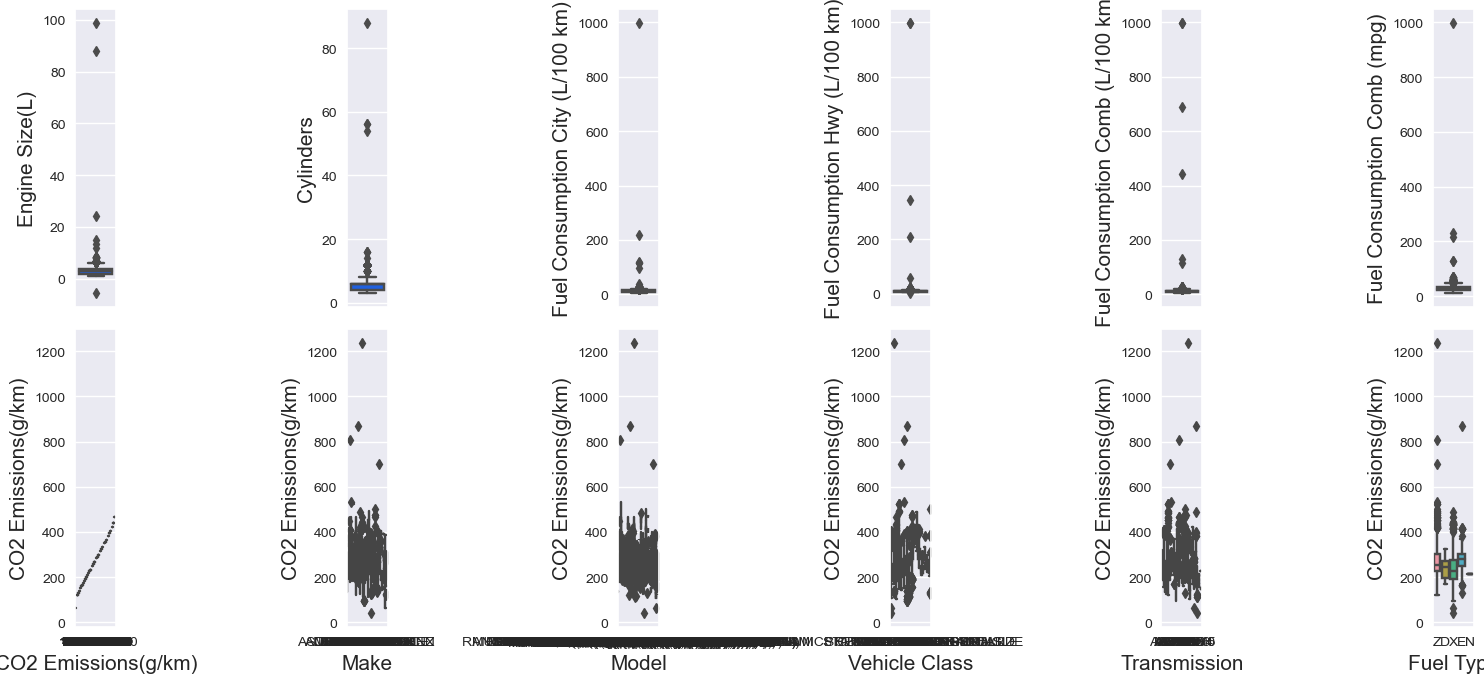

In [203]:
# Setting the style and color palette for Seaborn plots
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Defining the order of columns for plotting
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, df.select_dtypes(include='object').columns.values])

# Creating subplots for box plots
fig, ax = plt.subplots(2, 6, figsize=(15, 7), dpi=100)  # Adjust the number of columns to match your dataset

# Looping through columns for plotting
for i, col in enumerate(OrderedCols):
    x = i // 6
    y = i % 6
    if i < 6:  # Adjust this condition based on the number of numeric columns
        sns.boxplot(data=df, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='CO2 Emissions(g/km)', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()


<Axes: xlabel='Make', ylabel='CO2 Emissions(g/km)'>

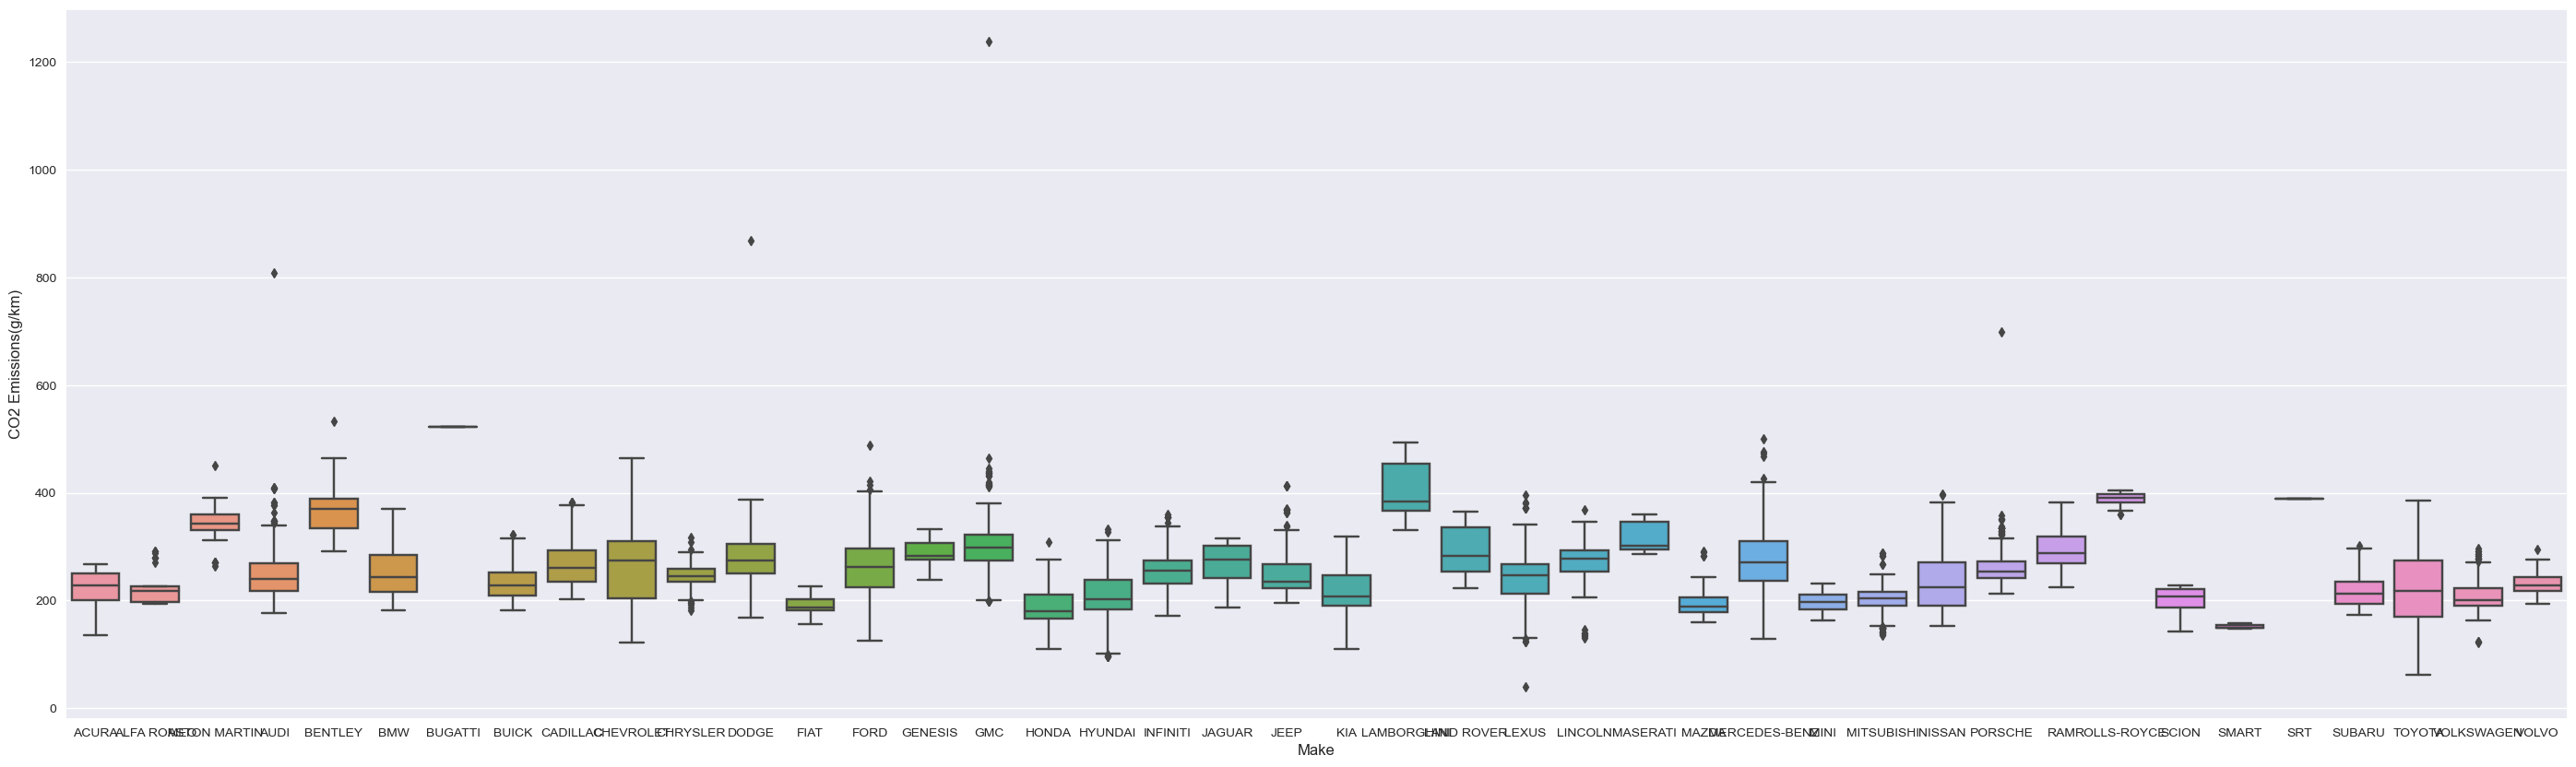

In [204]:
# Creating a box plot to visualize the relationship between "Fuel Type" and "CO2 Emissions(g/km)"
plt.figure(figsize=(35, 10))
sns.boxplot(data=df, x='Make', y='CO2 Emissions(g/km)')

In [205]:
# Create a violin plot with categories on the x-axis
#sns.box(x="Make",y='CO2 Emissions(g/km)', data=df)

#sns.displot(df['Make'])
# Show the plot
plt.show()

<Axes: >

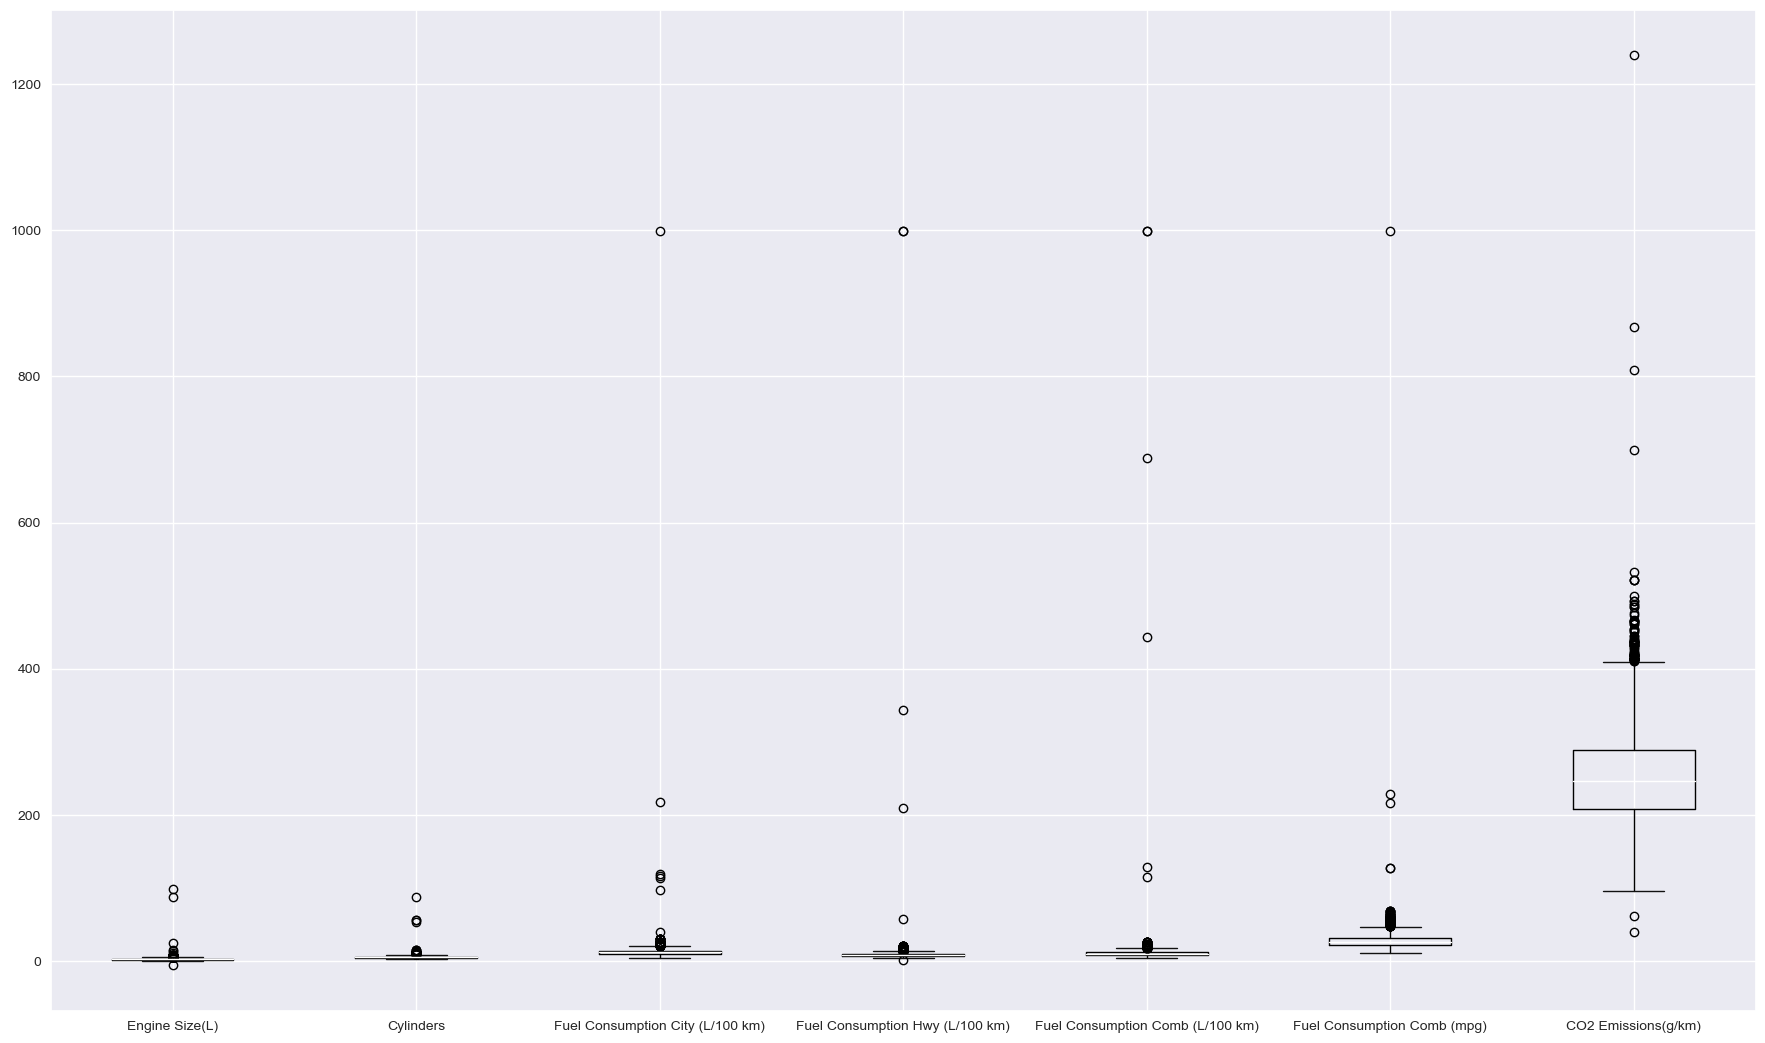

In [206]:
# Creating a large box plot for all numerical columns in the DataFrame
plt.figure(figsize=(22, 13))
df.boxplot()

In [207]:
# Identifying rows with negative values in numerical columns
negative_samples = []

for col in df.select_dtypes(exclude='object').columns:
    negative_samples_in_col = df[df[col] < 0]
    negative_samples.append(negative_samples_in_col)

# Concatenate the list of DataFrames into a single DataFrame
if negative_samples:
    negative_samples = pd.concat(negative_samples)

# Display the rows with negative values
negative_samples




,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
56,ACURA,TLX SH-AWD,COMPACT,-5.6,6.0,AS10,Z,10.0,1.2,5.6,30.0,228.0


In [208]:
# Dropping rows with negative values from the DataFrame
df = df.drop(negative_samples.index)

In [209]:
negative_samples = []

for col in df.select_dtypes(exclude='object').columns:
    negative_samples_in_col = df[df[col] < 0]
    negative_samples.append(negative_samples_in_col)

# Concatenate the list of DataFrames into a single DataFrame
if negative_samples:
    negative_samples = pd.concat(negative_samples)

# Display the rows with negative values
negative_samples


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [210]:
# Identifying outliers in the "Engine Size(L)" column using the IQR method
q1 = df["Engine Size(L)"].quantile(0.25)
q3 = df["Engine Size(L)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Engine Size(L)"] < minimum) | (df["Engine Size(L)"] > maximum)]

# Displaying the maximum and minimum values for identifying outliers
print(maximum)
print(minimum)

outlier_samples

6.25
-0.5500000000000003


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,ACURA,ILX,COMPACT,15.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
165,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,12.0,4.0,AS7,Z,11.5,8.1,10.0,28.0,220.0
182,AUDI,A8L,FULL-SIZE,6.3,12.0,AS8,Z,18.7,11.5,15.5,18.0,363.0
245,AUDI,A8L,FULL-SIZE,6.3,12.0,AS8,Z,17.8,10.8,14.6,19.0,344.0
299,AUDI,A8L QUATTRO,FULL-SIZE,6.3,12.0,AS8,Z,17.8,10.8,14.6,19.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6622,ROLLS-ROYCE,WRAITH,MID-SIZE,6.6,12.0,AS8,Z,19.6,12.8,16.5,17.0,387.0
6623,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12.0,AS8,Z,20.0,999.0,16.3,17.0,382.0
6653,SRT,VIPER COUPE,TWO-SEATER,8.4,10.0,M6,Z,20.0,13.0,16.9,17.0,389.0
6654,SRT,VIPER GTS COUPE,TWO-SEATER,8.4,10.0,M6,Z,20.0,13.0,16.9,17.0,389.0


In [211]:
# Identifying and displaying rows where "Engine Size(L)" is greater than 10
df[(df["Engine Size(L)"] > 10)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,ACURA,ILX,COMPACT,15.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
165,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,12.0,4.0,AS7,Z,11.5,8.1,10.0,28.0,220.0
549,BMW,ALPINA B7 XDRIVE LWB,FULL-SIZE,24.4,8.0,A8,Z,15.0,9.8,12.7,23.0,297.0
2162,DODGE,CHALLENGER,MID-SIZE,13.6,6.0,A8,X,12.4,7.8,10.3,27.0,242.0
5742,MINI,COOPER 3 DOOR,SUBCOMPACT,88.0,3.0,AM7,Z,8.3,6.4,7.5,38.0,174.0
7129,TOYOTA,4RUNNER 4WD,SUV - STANDARD,99.0,6.0,AS5,X,14.8,12.5,13.8,20.0,321.0


In [212]:
# Dropping rows where "Engine Size(L)" is greater than 10 from the DataFrame
df = df.drop(df[(df["Engine Size(L)"] > 10)].index)

In [213]:
# Identifying outliers in the "Cylinders" column using the IQR method
q1 = df["Cylinders"].quantile(0.25)
q3 = df["Cylinders"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Cylinders"] < minimum) | (df["Cylinders"] > maximum)]

# Printing the maximum and minimum values for identifying outliers
print(maximum)
print(minimum)

# Displaying the rows identified as outliers
outlier_samples

9.0
1.0


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
111,ASTON MARTIN,DB9,MINICOMPACT,5.9,12.0,A6,Z,18.0,12.60,15.6,18.0,359.0
112,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12.0,A6,Z,18.0,12.60,15.6,18.0,359.0
117,ASTON MARTIN,VANQUISH,MINICOMPACT,5.9,12.0,A6,Z,18.0,12.60,15.6,18.0,359.0
118,ASTON MARTIN,DB9,MINICOMPACT,5.9,12.0,A6,Z,18.0,12.60,15.6,18.0,359.0
119,ASTON MARTIN,RAPIDE S,SUBCOMPACT,6.0,12.0,A8,Z,16.8,10.90,14.2,20.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6622,ROLLS-ROYCE,WRAITH,MID-SIZE,6.6,12.0,AS8,Z,19.6,12.80,16.5,17.0,387.0
6623,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12.0,AS8,Z,20.0,999.00,16.3,17.0,382.0
6653,SRT,VIPER COUPE,TWO-SEATER,8.4,10.0,M6,Z,20.0,13.00,16.9,17.0,389.0
6654,SRT,VIPER GTS COUPE,TWO-SEATER,8.4,10.0,M6,Z,20.0,13.00,16.9,17.0,389.0


In [214]:
df[(df["Cylinders"] > 16)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3179,GMC,TERRAIN AWD,SUV - SMALL,2.0,54.0,A9,Z,11.2,9.00,10.2,28.0,1239.0
4123,JEEP,GRAND CHEROKEE 4X4,SUV - STANDARD,3.6,56.0,A8,X,12.7,9.60,11.3,25.0,265.0
5535,MERCEDES-BENZ,E 550 CABRIOLET,SUBCOMPACT,4.7,88.0,AS7,Z,13.7,9.30,11.7,24.0,269.0
6963,TOYOTA,SIENNA,MINIVAN,3.5,56.0,AS6,X,14.4,10.21,12.5,23.0,288.0


In [215]:
# Dropping rows where "Cylinders" is greater than 16 from the DataFrame
df = df.drop(df[(df["Cylinders"] > 16)].index)

In [216]:
q1 = df["Fuel Consumption City (L/100 km)"].quantile(0.25)
q3 = df["Fuel Consumption City (L/100 km)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Fuel Consumption City (L/100 km)"] < minimum) | (df["Fuel Consumption City (L/100 km)"] > maximum)]

print(maximum)
print(minimum)

outlier_samples

21.35
3.3499999999999996


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
142,ASTON MARTIN,V12 VANTAGE S,TWO-SEATER,6.0,12.0,M7,Z,23.2,14.4,19.2,15.0,450.0
188,AUDI,Q5 HYBRID,SUV - SMALL,3.0,4.0,AS8,Z,39.9,8.3,9.2,31.0,212.0
464,BENTLEY,CONTINENTAL GTC,SUBCOMPACT,4.0,8.0,AS9,Z,97.4,210.2,14.2,20.0,532.0
468,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,14.9,19.0,15.0,437.0
476,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,13.3,18.2,16.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4933,MASERATI,GHIBLI,MID-SIZE,3.0,6.0,AM9,Z,114.1,9.8,12.2,23.0,286.0
5238,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,AS7,Z,24.3,17.9,21.4,13.0,476.0
5299,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,AS7,Z,22.2,18.0,20.3,14.0,467.0
5365,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,A7,Z,22.2,18.0,20.3,14.0,473.0


In [217]:
df[(df["Fuel Consumption City (L/100 km)"] > 32)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
188,AUDI,Q5 HYBRID,SUV - SMALL,3.0,4.0,AS8,Z,39.9,8.3,9.2,31.0,212.0
464,BENTLEY,CONTINENTAL GTC,SUBCOMPACT,4.0,8.0,AS9,Z,97.4,210.2,14.2,20.0,532.0
1366,CHEVROLET,SONIC RS,COMPACT,1.4,4.0,M6,X,118.8,7.0,8.0,35.0,184.0
2164,DODGE,DURANGO AWD SRT,SUV - STANDARD,6.4,8.0,A8,Z,218.3,12.2,15.6,18.0,363.0
4522,LAND ROVER,RANGE ROVER SPORT V8 5.0 SC FFV,SUV - STANDARD,5.0,8.0,AS8,Z,116.6,11.3,14.7,29.0,338.0
4933,MASERATI,GHIBLI,MID-SIZE,3.0,6.0,AM9,Z,114.1,9.8,12.2,23.0,286.0
6572,RAM,1500 ETORQUE,PICKUP TRUCK - STANDARD,3.6,6.0,A8,X,999.0,9.4,10.8,26.0,253.0


In [218]:
# Dropping rows where "Fuel Consumption City (L/100 km)" is greater than 32 from the DataFrame
df = df.drop(df[(df["Fuel Consumption City (L/100 km)"] > 32)].index)

In [219]:
df[(df["Fuel Consumption City (L/100 km)"] > 32)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [220]:
q1 = df["Fuel Consumption Hwy (L/100 km)"].quantile(0.25)
q3 = df["Fuel Consumption Hwy (L/100 km)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Fuel Consumption Hwy (L/100 km)"] < minimum) | (df["Fuel Consumption Hwy (L/100 km)"] > maximum)]

print(maximum)
print(minimum)

outlier_samples

14.249999999999998
3.450000000000001


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
142,ASTON MARTIN,V12 VANTAGE S,TWO-SEATER,6.0,12.0,M7,Z,23.2,14.4,19.2,15.0,450.0
147,ASTON MARTIN,DB11 V12,MINICOMPACT,4.0,14.0,A8,Z,10.7,14.4,12.1,18.0,363.0
220,AUDI,TT COUPE QUATTRO,SUBCOMPACT,2.0,4.0,A6,Z,10.4,57.6,9.1,31.0,809.0
468,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,14.9,19.0,15.0,437.0
500,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,24.5,14.4,20.0,14.0,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6524,RAM,1500 4X4 FFV,PICKUP TRUCK - STANDARD,3.6,6.0,A8,E,20.7,14.7,18.0,16.0,300.0
6535,RAM,1500 4X4 FFV,PICKUP TRUCK - STANDARD,3.6,6.0,A8,E,20.7,14.7,18.0,16.0,300.0
6554,RAM,1500 CLASSIC 4X4 FFV,PICKUP TRUCK - STANDARD,3.6,6.0,A8,E,20.7,14.7,18.0,16.0,300.0
6623,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12.0,AS8,Z,20.0,999.0,16.3,17.0,382.0


In [221]:
df[(df["Fuel Consumption Hwy (L/100 km)"] > 25)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
220,AUDI,TT COUPE QUATTRO,SUBCOMPACT,2.0,4.0,A6,Z,10.4,57.6,9.1,31.0,809.0
5537,MERCEDES-BENZ,AMG C 43 4MATIC,COMPACT,3.0,6.0,A9,Z,12.4,343.0,10.7,26.0,253.0
6623,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12.0,AS8,Z,20.0,999.0,16.3,17.0,382.0
7131,TOYOTA,SIENNA,MINIVAN,3.5,6.0,AS8,X,12.6,999.0,11.0,26.0,259.0


In [222]:
# Dropping rows where "Fuel Consumption Hwy (L/100 km)" is greater than 25 from the DataFrame
df = df.drop(df[(df["Fuel Consumption Hwy (L/100 km)"] > 25)].index)

In [223]:
df[(df["Fuel Consumption Hwy (L/100 km)"] > 25)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [224]:
q1 = df["Fuel Consumption Comb (L/100 km)"].quantile(0.25)
q3 = df["Fuel Consumption Comb (L/100 km)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Fuel Consumption Comb (L/100 km)"] < minimum) | (df["Fuel Consumption Comb (L/100 km)"] > maximum)]

print(maximum)
print(minimum)

outlier_samples

18.15
3.3500000000000014


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
142,ASTON MARTIN,V12 VANTAGE S,TWO-SEATER,6.0,12.0,M7,Z,23.2,14.4,19.2,15.000000,450.0
180,AUDI,A8L,FULL-SIZE,3.0,6.0,AS8,Z,12.6,7.7,21.0,13.451476,321.0
468,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,14.9,19.0,15.000000,437.0
476,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,13.3,18.2,16.000000,419.0
492,BENTLEY,MULSANNE EWB,MID-SIZE,6.8,8.0,AS8,Z,22.2,13.6,18.3,15.000000,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5299,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,AS7,Z,22.2,18.0,20.3,14.000000,467.0
5365,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,A7,Z,22.2,18.0,20.3,14.000000,473.0
5838,MITSUBISHI,ECLIPSE CROSS 4WD,SUV - SMALL,1.5,4.0,AV8,X,9.6,8.9,689.0,30.000000,216.0
6795,SUBARU,CROSSTREK AWD,SUV - SMALL,2.0,4.0,AV8,X,8.5,7.0,999.0,36.000000,185.0


In [225]:
df[(df["Fuel Consumption Comb (L/100 km)"] > 30)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3178,GMC,CANYON,PICKUP TRUCK - SMALL,2.8,4.0,A6,D,10.8,8.0,129.6,29.0,257.0
4596,LAND ROVER,AMG C 63 S,COMPACT,5.0,8.0,AS8,Z,17.1,12.6,115.1,19.0,354.0
5114,MAZDA,CX-3,COMPACT,2.0,4.0,AS6,X,8.3,6.9,444.0,37.0,179.0
5838,MITSUBISHI,ECLIPSE CROSS 4WD,SUV - SMALL,1.5,4.0,AV8,X,9.6,8.9,689.0,30.0,216.0
6795,SUBARU,CROSSTREK AWD,SUV - SMALL,2.0,4.0,AV8,X,8.5,7.0,999.0,36.0,185.0
7130,TOYOTA,4RUNNER 4WD,MINICOMPACT,2.0,4.0,AS6,Z,9.9,7.3,999.0,32.0,204.0


In [226]:
# Dropping rows where "Fuel Consumption Comb (L/100 km)" is greater than 30 from the DataFrame
df = df.drop(df[(df["Fuel Consumption Comb (L/100 km)"] > 30)].index)

In [227]:
df[(df["Fuel Consumption Comb (L/100 km)"] > 30)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [228]:
q1 = df["Fuel Consumption Comb (mpg)"].quantile(0.25)
q3 = df["Fuel Consumption Comb (mpg)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["Fuel Consumption Comb (mpg)"] < minimum) | (df["Fuel Consumption Comb (mpg)"] > maximum)]

print(maximum)
print(minimum)

outlier_samples

47.0
7.0


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
171,AUDI,A6 QUATTRO,MID-SIZE,2.0,4.0,AS8,Z,12.0,8.1,10.2,128.0,235.0
210,AUDI,A6 QUATTRO,MID-SIZE,2.0,4.0,AS8,Z,12.0,8.1,10.2,128.0,235.0
1518,CHEVROLET,MALIBU HYBRID,MID-SIZE,1.8,4.0,AV,X,5.0,5.1,5.1,55.0,122.0
1611,CHEVROLET,MALIBU HYBRID,MID-SIZE,1.8,4.0,AV,X,4.8,5.5,5.1,55.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7111,TOYOTA,PRIUS AWD,MID-SIZE,1.8,4.0,AV,X,4.5,4.9,4.7,60.0,109.0
7112,TOYOTA,PRIUS C,COMPACT,1.5,4.0,AV,X,4.9,5.5,5.1,55.0,120.0
7160,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,1.4,4.0,AM7,Z,5.6,5.2,5.4,52.0,124.0
7204,VOLKSWAGEN,JETTA HYBRID,COMPACT,1.4,4.0,AM7,Z,5.6,4.9,5.3,53.0,122.0


In [229]:
df[(df["Fuel Consumption Comb (mpg)"] > 70)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
171,AUDI,A6 QUATTRO,MID-SIZE,2.0,4.0,AS8,Z,12.0,8.1,10.2,128.0,235.0
210,AUDI,A6 QUATTRO,MID-SIZE,2.0,4.0,AS8,Z,12.0,8.1,10.2,128.0,235.0
4122,JEEP,CHEROKEE,SUV - SMALL,2.4,4.0,A9,X,11.0,7.8,9.6,229.0,225.0
5534,MERCEDES-BENZ,E 550 CABRIOLET,MID-SIZE,4.7,8.0,AS7,Z,13.6,9.1,11.6,999.0,267.0
6962,TOYOTA,TACOMA,PICKUP TRUCK - SMALL,5.7,8.0,AS6,X,18.8,14.0,16.6,217.0,382.0


In [230]:
# Dropping rows where "Fuel Consumption Comb (mpg)" is greater than 70 from the DataFrame
df = df.drop(df[(df["Fuel Consumption Comb (mpg)"] > 70)].index)

In [231]:
df[(df["Fuel Consumption Comb (mpg)"] > 70)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [233]:
df['CO2 Emissions(g/km)'].max()

868.0

In [234]:
q1 = df["CO2 Emissions(g/km)"].quantile(0.25)
q3 = df["CO2 Emissions(g/km)"].quantile(0.75)
iqr = q3-q1
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
outlier_samples = df[(df["CO2 Emissions(g/km)"] < minimum) | (df["CO2 Emissions(g/km)"] > maximum)]

print(maximum)
print(minimum)

outlier_samples

409.875
86.875


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
142,ASTON MARTIN,V12 VANTAGE S,TWO-SEATER,6.0,12.0,M7,Z,23.2,14.4,19.2,15.0,450.0
468,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,14.9,19.0,15.0,437.0
476,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,22.3,13.3,18.2,16.0,419.0
492,BENTLEY,MULSANNE EWB,MID-SIZE,6.8,8.0,AS8,Z,22.2,13.6,18.3,15.0,430.0
500,BENTLEY,MULSANNE,MID-SIZE,6.8,8.0,AS8,Z,24.5,14.4,20.0,14.0,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5365,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12.0,A7,Z,22.2,18.0,20.3,14.0,473.0
5400,MERCEDES-BENZ,G 550,SUV - STANDARD,4.0,8.0,A7,Z,18.2,16.5,17.5,16.0,410.0
5536,MERCEDES-BENZ,E 63 AMG 4MATIC WAGON,STATION WAGON - MID-SIZE,5.5,8.0,AS7,Z,15.5,11.0,13.5,21.0,500.0
6474,PORSCHE,911 CARRERA S,MINICOMPACT,3.0,6.0,AM8,Z,13.1,9.7,11.5,25.0,699.0


In [235]:
df[(df["CO2 Emissions(g/km)"] > 550)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2163,DODGE,CHARGER FFV,FULL-SIZE,3.6,6.0,A5,E,18.9,12.7,16.1,18.0,868.0
6474,PORSCHE,911 CARRERA S,MINICOMPACT,3.0,6.0,AM8,Z,13.1,9.7,11.5,25.0,699.0


In [ ]:
# Dropping rows where "CO2 Emissions(g/km)" is greater than 550 from the DataFrame
df = df.drop(df[(df["CO2 Emissions(g/km)"] > 550)].index)

In [236]:
df[(df["CO2 Emissions(g/km)"] > 550)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2163,DODGE,CHARGER FFV,FULL-SIZE,3.6,6.0,A5,E,18.9,12.7,16.1,18.0,868.0
6474,PORSCHE,911 CARRERA S,MINICOMPACT,3.0,6.0,AM8,Z,13.1,9.7,11.5,25.0,699.0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7452
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7406 non-null   object 
 1   Model                             7406 non-null   object 
 2   Vehicle Class                     7406 non-null   object 
 3   Engine Size(L)                    7406 non-null   float64
 4   Cylinders                         7406 non-null   float64
 5   Transmission                      7406 non-null   object 
 6   Fuel Type                         7406 non-null   object 
 7   Fuel Consumption City (L/100 km)  7406 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7406 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7406 non-null   float64
 10  Fuel Consumption Comb (mpg)       7406 non-null   float64
 11  CO2 Emissions(g/km)               7406 non-null   float64
dtypes: flo

In [ ]:
# Dropping rows where "Fuel Consumption Comb (mpg)" is greater than 70 from the DataFrame
df = df.drop(df[(df["Fuel Consumption Comb (mpg)"] > 70)].index)


In [238]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
2,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
3,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
5,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7448,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0
7449,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0
7450,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.7,8.6,10.3,27.0,240.0
7451,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0


In [239]:
# plt.figure(figsize=(22, 13))
# df.boxplot()


<Axes: >

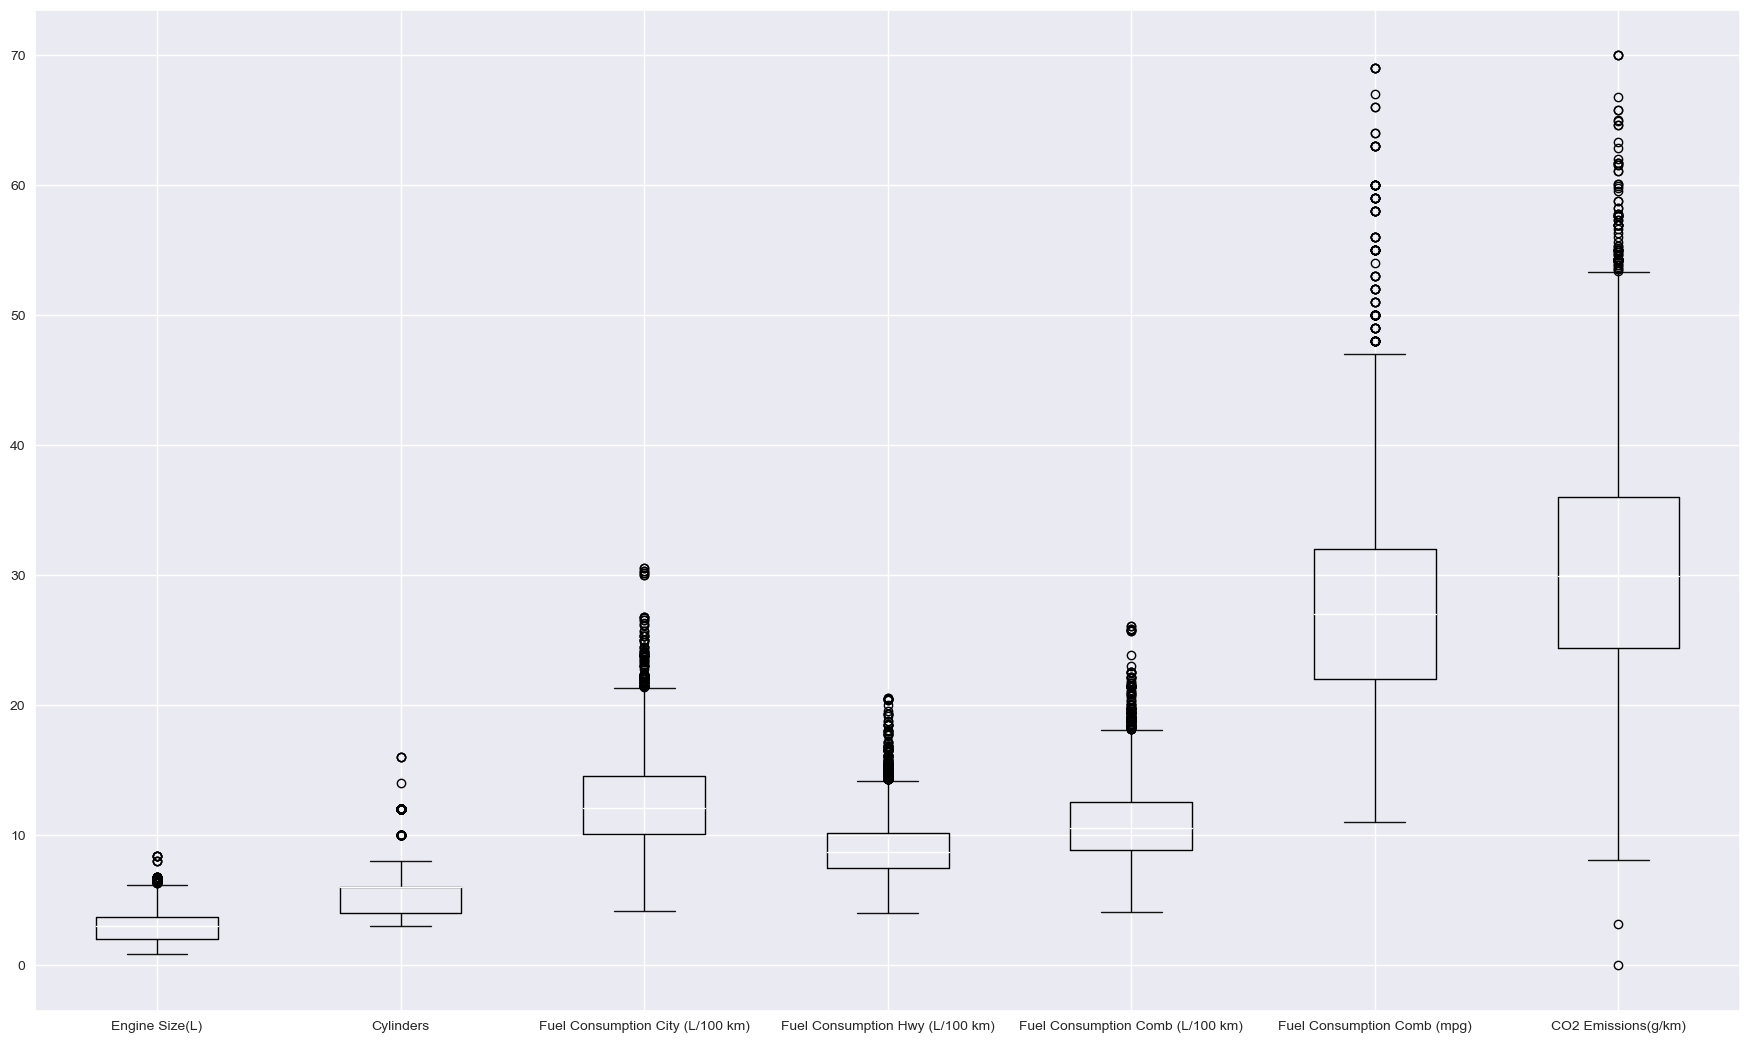

In [294]:
plt.figure(figsize=(22, 13))
df.boxplot()

In [242]:
df.shape

(7406, 12)

In [244]:
df['CO2 Emissions(g/km)'].min()

40.0

In [246]:
# Dropping rows where "Fuel Consumption Comb (mpg)" is greater than 70 from the DataFrame
df = df.drop(df[(df["CO2 Emissions(g/km)"] > 600)].index)

In [249]:
df['CO2 Emissions(g/km)'].max()

522.0

In [251]:
# from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 70))

# Assuming 'data' is your dataset and 'column' is the column you want to scale
# You need to reshape the column to a 2D array before scaling
column_to_scale = df['CO2 Emissions(g/km)'].values.reshape(-1, 1)

# Fit and transform the column using the scaler
scaled_column = scaler.fit_transform(column_to_scale)

# Replace the original column in the dataset with the scaled values
df['CO2 Emissions(g/km)'] = scaled_column


<Axes: >

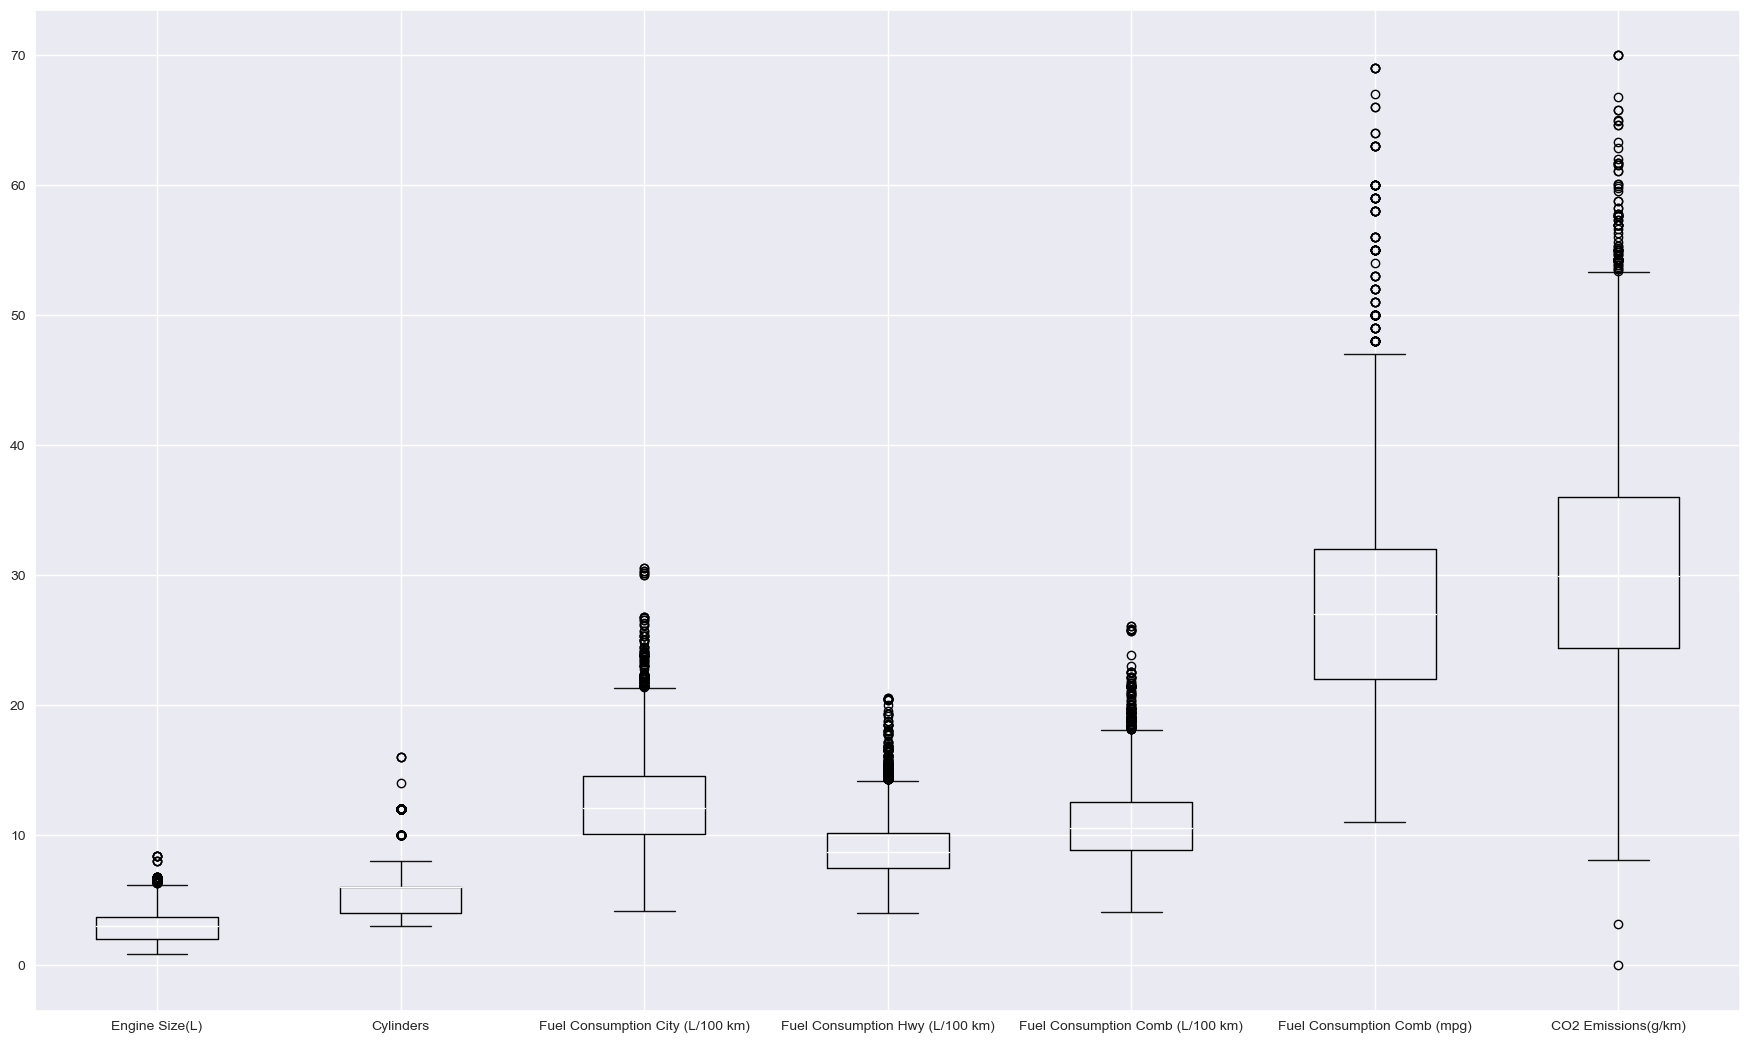

In [252]:
plt.figure(figsize=(22, 13))
df.boxplot()

In [ ]:
df

In [ ]:
target = 'CO2 Emissions(g/km)'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

In [253]:
x = df.drop('CO2 Emissions(g/km)', axis =1)

In [254]:
# List of categorical column names
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Use Pandas get_dummies to one-hot encode the categorical columns
x = pd.get_dummies(x, columns=categorical_columns)

# Now, all the specified categorical columns are one-hot encoded
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4.0,9.9,6.7,8.5,33.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.4,4.0,11.2,7.7,9.6,29.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.5,4.0,6.0,5.8,5.9,48.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3.5,6.0,12.7,9.1,11.1,25.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.5,6.0,12.1,8.7,10.6,27.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7448,2.0,4.0,10.7,7.7,9.4,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7449,2.0,4.0,11.2,8.3,9.9,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7450,2.0,4.0,11.7,8.6,10.3,27.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7451,2.0,4.0,11.2,8.3,9.9,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [255]:
y = df[['CO2 Emissions(g/km)']]
y

,CO2 Emissions(g/km)
0,22.655602
2,26.286307
3,13.941909
4,31.224066
5,29.626556
...,...
7448,25.995851
7449,27.883817
7450,29.045643
7451,27.883817


In [256]:
#Let's split our dataset by taking 80% of data for training and 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [257]:
X_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
230,2.0,4.0,10.6,7.3,9.1,31.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2514,1.6,4.0,9.0,7.1,8.1,35.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7396,2.0,4.0,9.6,7.0,8.4,34.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
118,5.9,12.0,18.0,12.6,15.6,18.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
59,3.5,6.0,12.2,9.0,10.8,26.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1.8,4.0,10.4,7.2,9.0,31.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5261,3.5,6.0,11.9,8.2,10.2,28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5425,3.0,6.0,12.9,8.8,11.1,25.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
883,4.4,8.0,16.2,10.9,13.8,20.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [258]:
X_train.to_csv('X_train.csv', index=False)  # Set index to False to exclude the index column in the CSV file
FileLink('X_train.csv')


C:\Users\Dell\Downloads\X_train.csv

In [259]:
X_train.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI',
       ...
       'Transmission_AV7', 'Transmission_AV8', 'Transmission_M5',
       'Transmission_M6', 'Transmission_M7', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object', length=1692)

In [260]:
y_train

,CO2 Emissions(g/km)
230,24.543568
2514,21.929461
7396,22.946058
118,46.327801
59,30.788382
...,...
5226,24.253112
5261,29.045643
5425,31.224066
883,41.244813


In [261]:
#Let's make a backup of our test data. We need this for the final comparison.
y_test_actual = y_test

In [262]:
# random_reg = RandomForestRegressor()
model = RandomForestRegressor(n_estimators=200, random_state=42)  # You can adjust the number of estimators and other hyperparameters
model.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

In [263]:
model.score(X_train, y_train)

0.9983465536556577

In [264]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(data=feature_importances, index=x.columns, columns=['Importance'])

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
feature_importance_df

,Importance
Fuel Consumption Comb (L/100 km),0.752403
Fuel Consumption Comb (mpg),0.168099
Fuel Type_E,0.050988
Fuel Consumption City (L/100 km),0.011959
Fuel Type_D,0.006164
...,...
Model_LS 500H AWD,0.000000
Model_LACROSSE FFV,0.000000
Model_VIPER COUPE,0.000000
Model_CT4-V,0.000000


In [265]:
def model_evaluation(model, X_test, y_test, model_name):
    # Use the 'model' to make predictions on the test dataset 'X_test'.
    y_pred = model.predict(X_test)
    
    # Calculate various regression metrics:
    # 1. Mean Absolute Error (MAE)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    # 2. Mean Squared Error (MSE)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    # 3. Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    # 4. R-squared Score (R2-Score)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    # Create a DataFrame with the calculated metrics, using 'model_name' as the column label.
    result_df = pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])
    
    # Return the DataFrame containing the metrics.
    return result_df

# Call the 'model_evaluation' function with the specified model, test data, and model name.
model_evaluation(model, X_train, y_train, 'Random forest reg')


,Random forest reg
MAE,0.119063
MSE,0.119707
RMSE,0.345988
R2-Score,0.998347


In [267]:
def model_evaluation(model, X_test, y_test, model_name):
    # Use the 'model' to make predictions on the test dataset 'X_test'.
    y_pred = model.predict(X_test)
    
    # Calculate various regression metrics:
    # 1. Mean Absolute Error (MAE)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    # 2. Mean Squared Error (MSE)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    # 3. Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    # 4. R-squared Score (R2-Score)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    # Create a DataFrame with the calculated metrics, using 'model_name' as the column label.
    result_df = pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])
    
    # Return the DataFrame containing the metrics.
    return result_df

# Call the 'model_evaluation' function with the specified model, test data, and model name.
model_evaluation(model, X_test, y_test, 'Random forest reg')


,Random forest reg
MAE,0.284702
MSE,0.642440
RMSE,0.801524
R2-Score,0.991342


In [266]:
# linear_reg_cv = LinearRegression()
# scaler = StandardScaler()
# pipeline = make_pipeline(StandardScaler(),  LinearRegression())

# kf = KFold(n_splits=6, shuffle=True, random_state=0) 
# scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
# result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

# MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
# MAE_std = (-result['test_neg_mean_absolute_error']).std()
# MSE_mean = (-result['test_neg_mean_squared_error']).mean()
# MSE_std = (-result['test_neg_mean_squared_error']).std()
# RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
# RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
# R2_Score_mean = result['test_r2'].mean()
# R2_Score_std = result['test_r2'].std()

# pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
#              index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

In [268]:
model.score(X_test, y_test)

0.9913417197596472

In [269]:
# Use the 'model' to make predictions on the 'X_train' dataset.
y_test_pred = model.predict(X_train)

# Create a DataFrame 'ytest_ored' with a single column named 'y_test_pred' to store the predictions.
ytrain_pred = pd.DataFrame({'y_test_pred': y_test_pred})

# Display the 'ytest_ored' DataFrame, showing the predicted values.
ytrain_pred


,y_test_pred
0,24.680688
1,21.808437
2,22.884336
3,46.349585
4,30.722000
...,...
5918,24.306120
5919,28.650925
5920,31.328147
5921,41.158705


In [270]:
# Use the 'model' to make predictions on the 'X_test' dataset.
y_predict = model.predict(X_test)

# Create a DataFrame 'predict_df' with a single column named 'Predicted' to store the predictions.
predict_df = pd.DataFrame({'Predicted': y_predict})

# Display the 'predict_df' DataFrame, showing the predicted values.
predict_df


,Predicted
0,34.597536
1,28.905619
2,39.913589
3,20.654175
4,24.572578
...,...
1476,34.371162
1477,39.929046
1478,40.481639
1479,43.395922


In [271]:
# Reset the index of the 'y_test_actual' DataFrame and modify it in place.
y_test_actual.reset_index(drop=True, inplace=True)

# Concatenate 'y_test_actual' and 'predict_df' DataFrames along the columns (axis=1).
prediction_result = pd.concat([y_test_actual, predict_df], axis=1)

# Display the resulting 'prediction_result' DataFrame.
prediction_result


,CO2 Emissions(g/km),Predicted
0,34.709544,34.597536
1,28.900415,28.905619
2,40.228216,39.913589
3,20.622407,20.654175
4,24.543568,24.572578
...,...,...
1476,34.273859,34.371162
1477,39.937759,39.929046
1478,39.937759,40.481639
1479,42.697095,43.395922


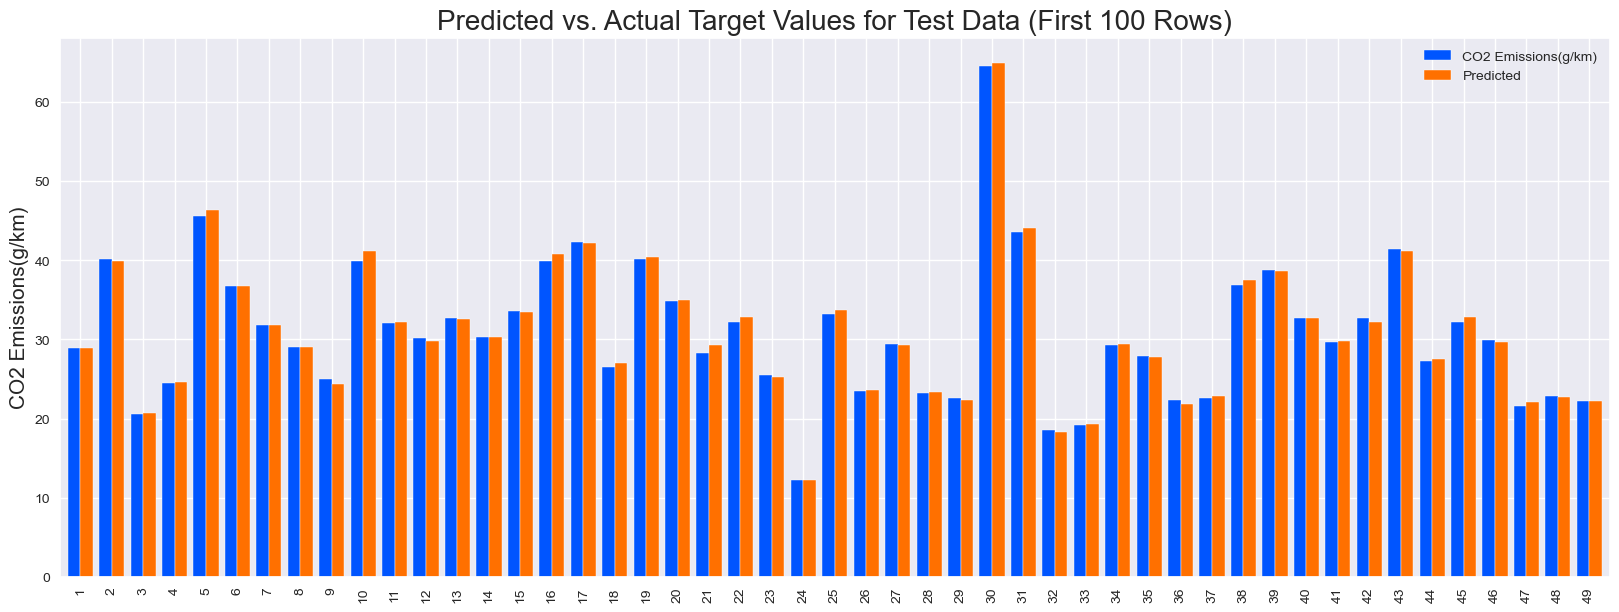

In [272]:
# compare_plot(result)
def compare_plot(df_comp):
    #df_comp.reset_index(inplace=True)
    df_comp_first_100 = df_comp.iloc[1:50]  # Slice the DataFrame to include only the first 100 rows
    df_comp_first_100.plot(y=['CO2 Emissions(g/km)', 'Predicted'], kind='bar', figsize=(20, 7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data (First 100 Rows)', fontsize=20)
    plt.ylabel('CO2 Emissions(g/km)', fontsize=15)
    plt.show()

compare_plot(prediction_result)

In [273]:
# Assuming you've already trained your model and made predictions
normalized_predictions = model.predict(X_test)

# Denormalize the predictions using the scaler's parameters
denormalized_predictions = scaler.inverse_transform(normalized_predictions.reshape(-1, 1))

# 'denormalized_predictions' now contains the actual predicted values in the original scale


In [274]:
denormalized_predictions
prediction_one_dim_list = [element for row in denormalized_predictions for element in row]
denormalized_predictions_df=pd.DataFrame({'denormalized_predictions': prediction_one_dim_list})
denormalized_predictions_df

,denormalized_predictions
0,278.228750
1,239.035833
2,314.833571
3,182.218750
4,209.199750
...,...
1476,276.670000
1477,314.940000
1478,318.745000
1479,338.811917


In [290]:
denormalized_actual_val = scaler.inverse_transform(y_test_actual)

In [291]:
actual_one_dim_list = [element for row in denormalized_actual_val for element in row]
denormalized_actual_val_df=pd.DataFrame({'denormalized_actual_val': actual_one_dim_list})
denormalized_actual_val_df

,denormalized_actual_val
0,279.0
1,239.0
2,317.0
3,182.0
4,209.0
...,...
1476,276.0
1477,315.0
1478,315.0
1479,334.0


In [292]:
df_norm = denormalized_actual_val_df 
df_norm.to_csv('normalized.csv', index=False)  # Set index to False to exclude the index column in the CSV file
FileLink('normalized.csv')

C:\Users\Dell\Downloads\normalized.csv

In [277]:
denormalized_result = pd.concat([denormalized_predictions_df, denormalized_actual_val_df], axis=1)
denormalized_result.head(10)

,denormalized_predictions,denormalized_actual_val
0,278.228750,279.0
1,239.035833,239.0
2,314.833571,317.0
3,182.218750,182.0
4,209.199750,209.0
5,359.700000,354.0
6,292.960000,293.0
7,258.920000,259.0
8,239.735000,240.0
9,207.495000,212.0


In [ ]:
# score_train = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
# print(score_train)
# absolute(np.mean(score_train))

In [ ]:
# score_test = cross_val_score(model, X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)
# absolute(np.mean(score_test))

In [278]:
# Define the categorical variables to one-hot encode
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

user_input= {
    'Make': ['ALFA ROMEO'],
    'Model': ['4C'],  # Include both Make and Model
    'Vehicle Class': ['TWO-SEATER'],
    'Engine Size(L)': [1.8],  # Update the Engine Size
    'Cylinders': [4.0],
    'Transmission': ['AM6'],  # Update the Transmission
    'Fuel Type': ['Z'],
    'Fuel Consumption City (L/100 km)': [9.7],  # Update fuel consumption values
    'Fuel Consumption Hwy (L/100 km)': [6.9],
    
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame(user_input)

# One-hot encode the categorical variables to match X_train columns
user_input_encoded = pd.get_dummies(user_input_df, columns=categorical_columns)

# Initialize the user input DataFrame with all zeros and columns from X_train
user_input_for_prediction = pd.DataFrame(0, index=[0], columns=X_train.columns)

# Fill in the columns that match based on user input
for col in user_input_encoded.columns:
    if col in user_input_for_prediction.columns:
        user_input_for_prediction.loc[0, col] = user_input_encoded[col].iloc[0]

# Calculate 'Fuel Consumption Comb (L/100 km)' based on 'Fuel Consumption City (L/100 km)' and 'Fuel Consumption Hwy (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (L/100 km)'] = (0.55 * user_input_for_prediction['Fuel Consumption City (L/100 km)'] +
                                                              0.45 * user_input_for_prediction['Fuel Consumption Hwy (L/100 km)'])

# Calculate 'Fuel Consumption Comb (mpg)' based on 'Fuel Consumption Comb (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (mpg)'] = 282.481/ user_input_for_prediction['Fuel Consumption Comb (L/100 km)']

# Make predictions
predictions = model.predict(user_input_for_prediction)

# The 'predictions' variable now contains the predicted values for the user input
print(predictions)

denormalized_userinput = scaler.inverse_transform(predictions.reshape(-1, 1))
print(denormalized_userinput)


[22.71581185]
[[196.41459019]]


In [280]:
user_input_for_prediction

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,1.8,4,9.7,6.9,8.44,33.469313,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [281]:
# Check for non-zero values in each column
non_zero_columns = user_input_for_prediction.columns[user_input_for_prediction.any()]

# Print the column names with non-zero values
print(non_zero_columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ALFA ROMEO', 'Model_4C',
       'Vehicle Class_TWO-SEATER', 'Transmission_AM6', 'Fuel Type_Z'],
      dtype='object')


In [282]:
unique_values_models = X_train.columns

col_name=[]

for value in unique_values_models:
    # print(value)
    col_name.append(value)

sorted_list_col = sorted(col_name)
# sorted_list_col

In [283]:
# Specify the file path where you want to save the model
model_filename = 'D:\Datasets\d\\random_forest_model\\random_forest_model.pkl'

# Use pickle to save the model to a file
with open(model_filename, 'wb') as model_file:
    pk.dump(model, model_file)

#FileLink(model_filename)

In [284]:
#loading the saved model
with open(model_filename, 'rb') as model_file:
    loaded_model = pk.load(model_file)

In [287]:
# Define the categorical variables to one-hot encode
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

user_input = {
    'Make': ['ACURA'],
    'Model': ['ILX'],
    'Vehicle Class': ['COMPACT'],
    'Engine Size(L)': [2.0],
    'Cylinders': [4.0],
    'Transmission': ['AS5'],
    'Fuel Type': ['Z'],
    'Fuel Consumption City (L/100 km)': [9.9],
    'Fuel Consumption Hwy (L/100 km)': [6.7],
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame(user_input)

# One-hot encode the categorical variables to match X_train columns
user_input_encoded = pd.get_dummies(user_input_df, columns=categorical_columns)

# Initialize the user input DataFrame with all zeros and columns from X_train
user_input_for_prediction = pd.DataFrame(0, index=[0], columns=X_train.columns)

# Fill in the columns that match based on user input
for col in user_input_encoded.columns:
    if col in user_input_for_prediction.columns:
        user_input_for_prediction.loc[0, col] = user_input_encoded[col].iloc[0]

# Calculate 'Fuel Consumption Comb (L/100 km)' based on 'Fuel Consumption City (L/100 km)' and 'Fuel Consumption Hwy (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (L/100 km)'] = (0.55 * user_input_for_prediction['Fuel Consumption City (L/100 km)'] +
                                                              0.45 * user_input_for_prediction['Fuel Consumption Hwy (L/100 km)'])

# Calculate 'Fuel Consumption Comb (mpg)' based on 'Fuel Consumption Comb (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (mpg)'] = 282.481/ user_input_for_prediction['Fuel Consumption Comb (L/100 km)']

# Make predictions
predictions = loaded_model.predict(user_input_for_prediction)

# The 'predictions' variable now contains the predicted values for the user input
print(predictions)

denormalized_userinput = scaler.inverse_transform(predictions.reshape(-1, 1))
print(denormalized_userinput)


[22.94387967]
[[197.985]]


In [293]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.1
